In [50]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [51]:
df = pd.read_csv(r"C:\Users\SD\Downloads\Advertising Campaign Analytics\Ad-data.csv")
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  16834 non-null  object 
 1   product               16834 non-null  object 
 2   phase                 16834 non-null  object 
 3   campaign_platform     16834 non-null  object 
 4   campaign_type         16834 non-null  object 
 5   communication_medium  16834 non-null  object 
 6   subchannel            16834 non-null  object 
 7   audience_type         16834 non-null  object 
 8   creative_type         16834 non-null  object 
 9   creative_name         16834 non-null  object 
 10  device                16834 non-null  object 
 11  age                   16834 non-null  object 
 12  spends                16834 non-null  float64
 13  impressions           16834 non-null  int64  
 14  clicks                16834 non-null  int64  
 15  link_clicks        

In [53]:
## Capitalize the first word in every column
df.columns = df.columns.str.capitalize()


In [54]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   Product               16834 non-null  object        
 2   Phase                 16834 non-null  object        
 3   Campaign_platform     16834 non-null  object        
 4   Campaign_type         16834 non-null  object        
 5   Communication_medium  16834 non-null  object        
 6   Subchannel            16834 non-null  object        
 7   Audience_type         16834 non-null  object        
 8   Creative_type         16834 non-null  object        
 9   Creative_name         16834 non-null  object        
 10  Device                16834 non-null  object        
 11  Age                   16834 non-null  object        
 12  Spends                16834 non-null  float64       
 13  Impressions     

,Date,Product,Phase,Campaign_platform,Campaign_type,Communication_medium,Subchannel,Audience_type,Creative_type,Creative_name,Device,Age,Spends,Impressions,Clicks,Link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.0,2,0,0.0


In [56]:
## Check for null values
df.isnull().sum()

Date                      0
Product                   0
Phase                     0
Campaign_platform         0
Campaign_type             0
Communication_medium      0
Subchannel                0
Audience_type             0
Creative_type             0
Creative_name             0
Device                    0
Age                       0
Spends                    0
Impressions               0
Clicks                    0
Link_clicks             546
dtype: int64

In [57]:
## Filling null values
df.interpolate(method='linear', inplace=True)


In [58]:
## Check for null values
df.isnull().sum()

Date                    0
Product                 0
Phase                   0
Campaign_platform       0
Campaign_type           0
Communication_medium    0
Subchannel              0
Audience_type           0
Creative_type           0
Creative_name           0
Device                  0
Age                     0
Spends                  0
Impressions             0
Clicks                  0
Link_clicks             0
dtype: int64

In [59]:
# Create CTR(Click through rate) and link-through rate features
df['CTR'] = df['Clicks'] / df['Impressions'].replace(0, np.nan)## Creates CTR and replaces null with 0
df['Link_CTR'] = df['Link_clicks'] / df['Impressions'].replace(0, np.nan)

In [60]:
df.head(3)

,Date,Product,Phase,Campaign_platform,Campaign_type,Communication_medium,Subchannel,Audience_type,Creative_type,Creative_name,Device,Age,Spends,Impressions,Clicks,Link_clicks,CTR,Link_CTR
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.0,2,0,0.0,0.0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.0,5,0,0.0,0.0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.0,1,0,0.0,0.0,0.0


In [61]:

df['Creative_name'].value_counts()


Creative_name
'-          15101
Click         644
Carousal      603
Girl          486
Name: count, dtype: int64

In [62]:
print(df['Creative_name'].unique())


["'-" 'Carousal' 'Click' 'Girl']


In [63]:
## Cleaning the creative name column
df['Creative_name'] = df['Creative_name'].replace("'-", 'Unknown')
name_counts = df['Creative_name'].value_counts()
rare_names = name_counts[name_counts < 500].index
df['Creative_name'] = df['Creative_name'].replace(rare_names, 'Other')


In [64]:

df['Creative_name'].value_counts()


Creative_name
Unknown     15101
Click         644
Carousal      603
Other         486
Name: count, dtype: int64

In [65]:
df['Creative_type'].value_counts()


Creative_type
'-          15101
Image        1130
Carousal      603
Name: count, dtype: int64

In [66]:
df['Creative_type'] = df['Creative_type'].replace("'-", 'Unknown')

In [67]:
df['Creative_type'].value_counts()


Creative_type
Unknown     15101
Image        1130
Carousal      603
Name: count, dtype: int64

In [68]:
df['Audience_type'].value_counts()


Audience_type
'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: count, dtype: int64

In [69]:
df['Audience_type'] = df['Audience_type'].replace("'-", 'Unknown')

In [70]:
df['Audience_type'].value_counts()


Audience_type
Unknown       15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: count, dtype: int64

In [71]:
df['Subchannel'].value_counts()


Subchannel
Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: count, dtype: int64

In [72]:
df['Campaign_platform'].value_counts()


Campaign_platform
Google Ads      15101
Facebook Ads     1733
Name: count, dtype: int64

In [73]:
df['Campaign_type'].value_counts()


Campaign_type
Search         15101
Conversions     1733
Name: count, dtype: int64

In [74]:
df['Phase'].value_counts()


Phase
Performance    16834
Name: count, dtype: int64

In [76]:
df['Product'].value_counts()


Product
Product 1    16834
Name: count, dtype: int64

In [77]:
df['Device'].value_counts()

Device
Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: count, dtype: int64

In [78]:
df['Device'] = df['Device'].replace({'device': 'Others'})


In [79]:
df['Device'].value_counts()

Device
Mobile     7357
Desktop    6318
Others     1733
Tablet     1426
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Total Spend by Platform')

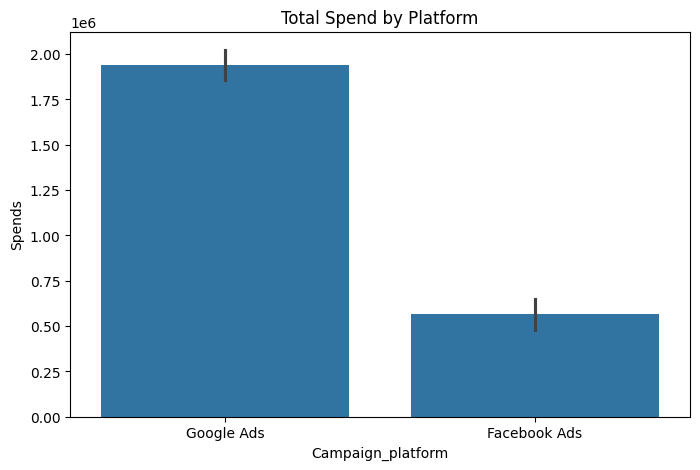

In [80]:
# Total spend by platform
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Campaign_platform', y='Spends', estimator=sum)
plt.title("Total Spend by Platform")

More money was spent on Google Ads than Facebook Ads.

Text(0.5, 1.0, 'CTR Distribution by Age Group')

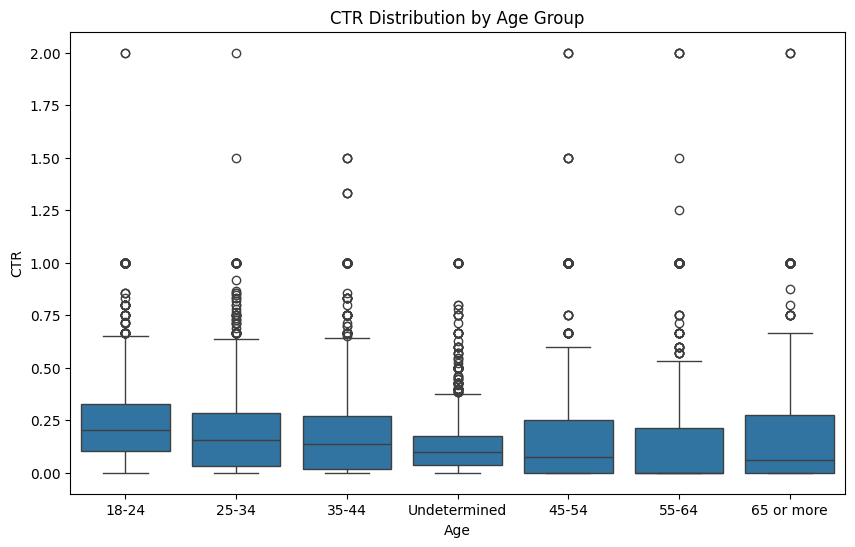

In [81]:
# CTR by Age
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='CTR')
plt.title("CTR Distribution by Age Group")

<Axes: title={'center': 'Monthly Spend Trend'}, xlabel='Date'>

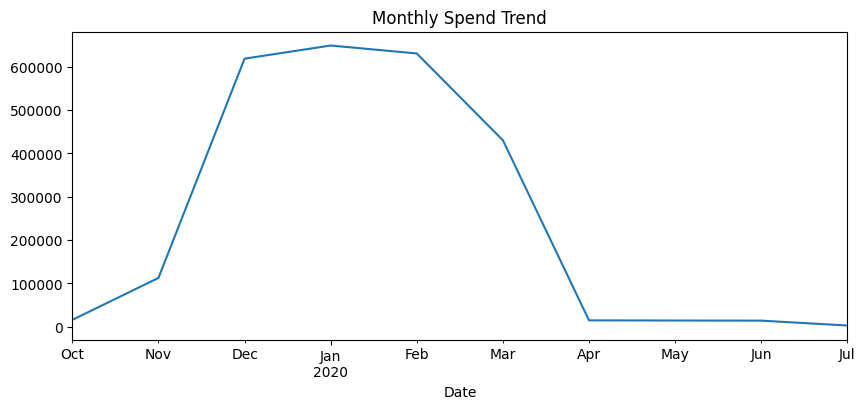

In [82]:
# Time trend of spends
df.set_index('Date').resample('M')['Spends'].sum().plot(title="Monthly Spend Trend", figsize=(10,4))


Text(0.5, 1.0, 'Average Clicks by Device')

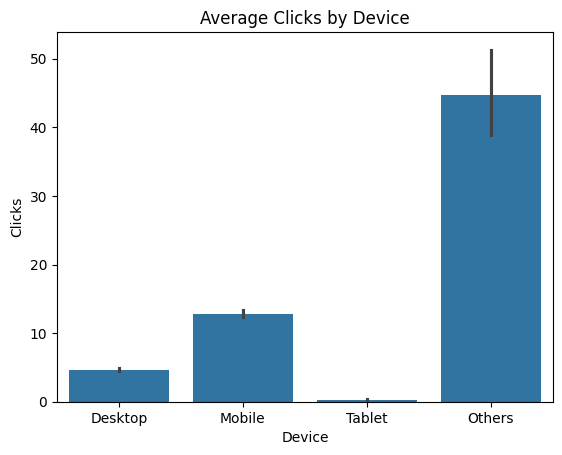

In [83]:
# Device performance
sns.barplot(data=df, x='Device', y='Clicks', estimator=np.mean)
plt.title("Average Clicks by Device")

Other devices had the most clicks.

Text(0.5, 1.0, 'Total Impressions by Platform')

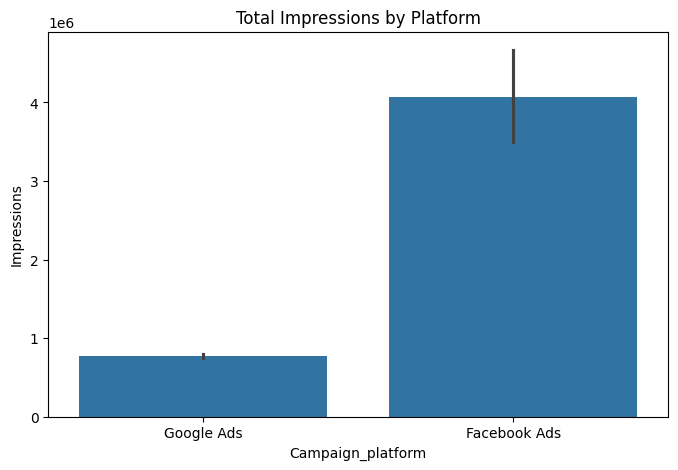

In [84]:
# Total impression by platform
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Campaign_platform', y='Impressions', estimator=sum)
plt.title("Total Impressions by Platform")

Most of the impressions were gotten from the Facebook ad campaign

Text(0.5, 1.0, 'CTR by Platform')

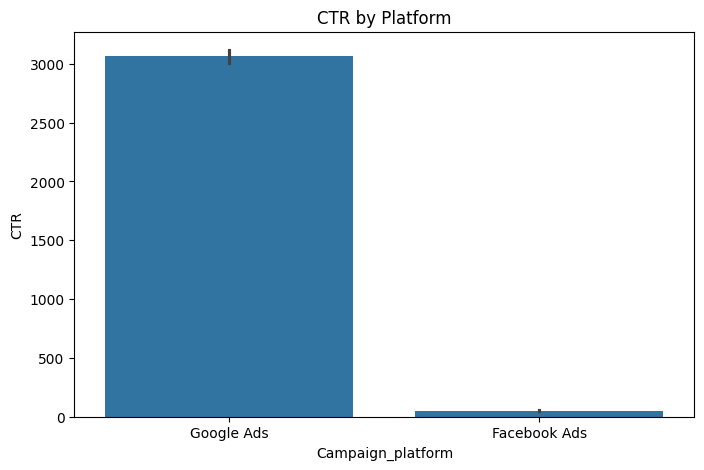

In [85]:
# CTR by platform
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Campaign_platform', y='CTR', estimator=sum)
plt.title("CTR by Platform")

## Feature Engineering

In [86]:
# Split features and target

X = df.drop(['Link_clicks'], axis=1)
y = df['Link_clicks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
## Encoding categorical columns
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Encode all object columns
label_encoders = {}
for col in X_train_enc.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train_enc[col].astype(str))
    X_test_enc[col] = le.transform(X_test_enc[col].astype(str)) 
    label_encoders[col] = le 


In [90]:
X_train_enc.head(1)

,Date,Product,Phase,Campaign_platform,Campaign_type,Communication_medium,Subchannel,Audience_type,Creative_type,Creative_name,Device,Age,Spends,Impressions,Clicks,CTR,Link_CTR
8877,2020-02-11,0,0,1,1,1,0,3,2,3,3,2,0.0,2,0,0.0,0.0


In [91]:
X_test_enc.head(1)

,Date,Product,Phase,Campaign_platform,Campaign_type,Communication_medium,Subchannel,Audience_type,Creative_type,Creative_name,Device,Age,Spends,Impressions,Clicks,CTR,Link_CTR
11799,2020-03-04,0,0,0,0,0,2,0,0,0,2,3,6.69,65,1,0.015385,0.015385


In [39]:
## Compute correlation


In [92]:
corr_matrix = X_train_enc.corr(numeric_only=True)


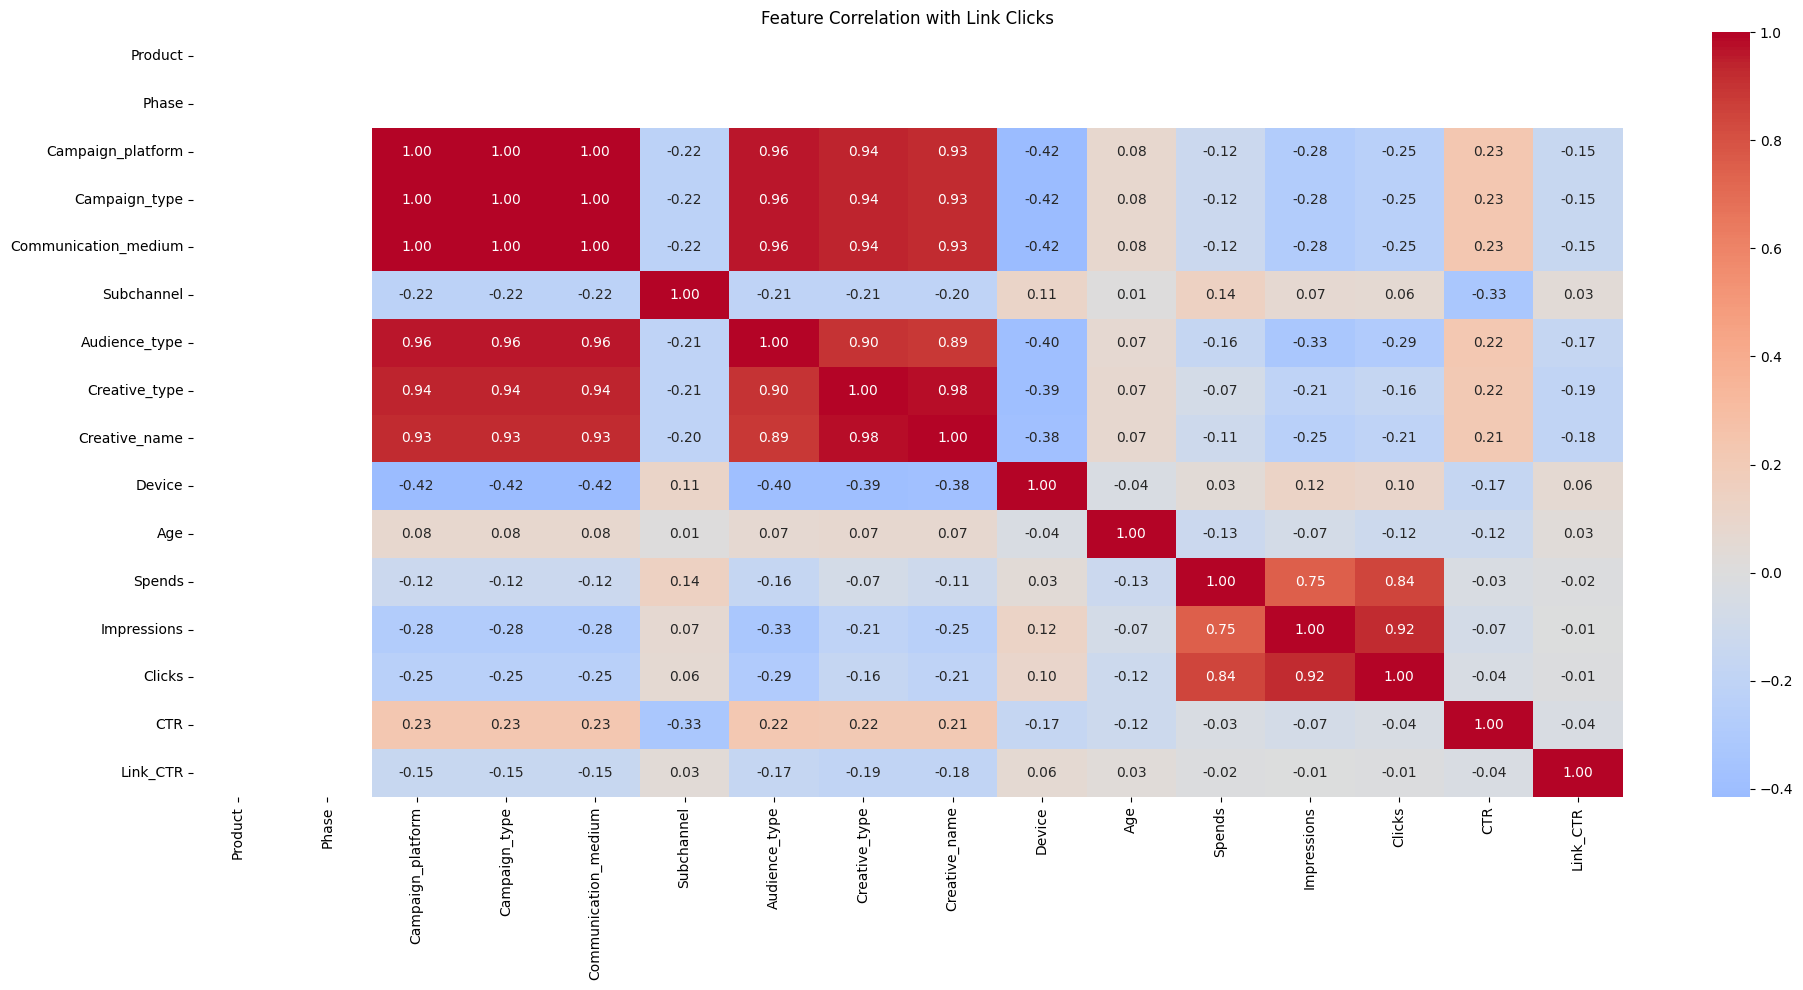

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Feature Correlation with Link Clicks")
plt.tight_layout()
plt.show()


In [95]:
import pandas as pd

df = X_train_enc.copy()
df['target'] = y

correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations


target                  1.000000
Impressions             0.837953
Clicks                  0.797454
Spends                  0.600400
Link_CTR                0.336373
Device                  0.174429
Subchannel              0.092137
Date                    0.008131
Age                    -0.055016
CTR                    -0.102259
Creative_type          -0.373683
Creative_name          -0.404460
Campaign_type          -0.420265
Campaign_platform      -0.420265
Communication_medium   -0.420265
Audience_type          -0.475581
Product                      NaN
Phase                        NaN
Name: target, dtype: float64


In [97]:
vars_to_drop = ['Date','Campaign_type', 'Communication_medium','Creative_name','Age','Device','CTR','Audience_type','Subchannel','Product','Phase']
X_train_enc = X_train_enc.drop(columns=vars_to_drop)


In [99]:
X_train_enc.head(2)

,Campaign_platform,Creative_type,Spends,Impressions,Clicks,Link_CTR
8877,1,2,0.00,2,0,0.0
6806,1,2,17.08,12,2,0.0


In [100]:
X_test_enc = X_test_enc.drop(columns=vars_to_drop)

In [103]:
X_test_enc.head(2)

,Campaign_platform,Creative_type,Spends,Impressions,Clicks,Link_CTR
11799,0,0,6.69,65,1,0.015385
736,1,2,0.00,2,0,0.000000


## Regression Model

In [105]:
## Train the model

model = RandomForestRegressor(random_state=42)
model.fit(X_train_enc, y_train)

y_pred = model.predict(X_test_enc)
rmse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")


Test RMSE: 5.3335


In [106]:
## Model Accuracy
print("Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Regression Results:
MAE: 0.2759422086922087
RMSE: 2.3094330811190282
R²: 0.9867393977603636
